In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11490434/11490434 [==============================] - 1s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#50804): Which is digit '0'


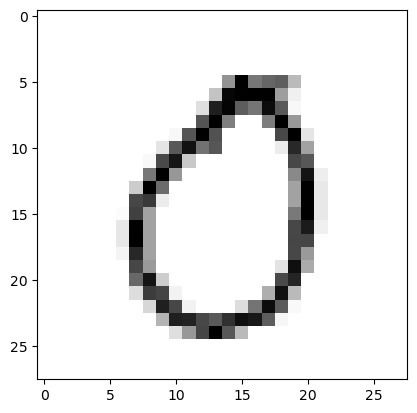

In [5]:
digit = np.random.randint(1,x_train.shape[0]) # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

Image (#38301): Which is digit '4'


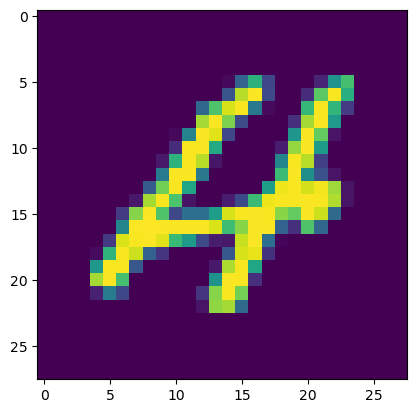

In [6]:
digit = np.random.randint(1,x_train.shape[0])
a = x_train[digit]
plt.imshow(a)
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [7]:
# summarize pixel values
print('Train: ', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test: ', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

Train:  0 255 33.318421449829934 78.56748998339798
Test:  0 255 33.791224489795916 79.17246322228644


In [8]:
x_train = x_train.reshape(-1, 28*28).astype("float64") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float64") / 255.0

# AlexNet Architecture

## Prepocessing

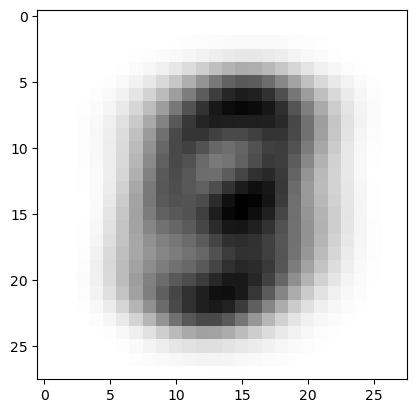

In [9]:
mean_img = np.mean(x_train,axis=0)
plt.imshow(mean_img.reshape(28,28).astype('float64'),cmap='gray_r')
plt.show()

In [10]:
x_train_norm, x_test_norm = x_train - mean_img, x_test-mean_img

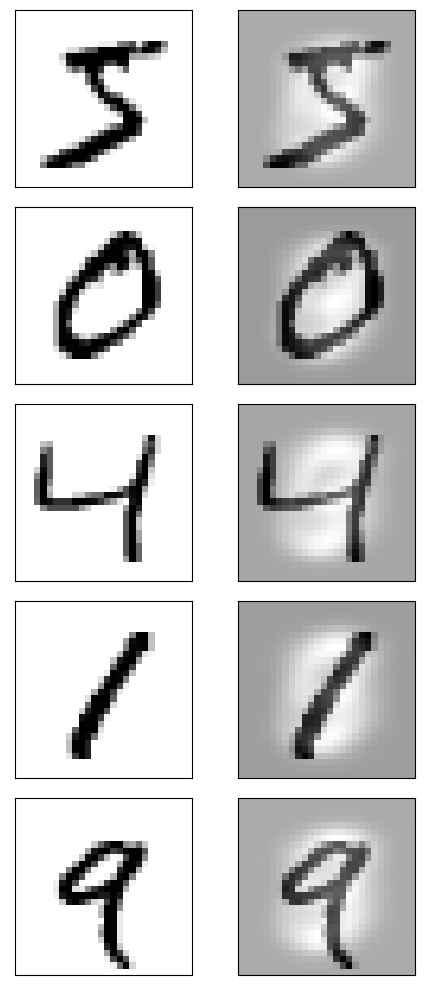

In [11]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(x_train[i].reshape(28,28).astype('float64'),cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(x_train_norm[i].reshape(28,28).astype('float64'),cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [17]:
t = x_train_norm.reshape(28,28,1)

t.shape

ValueError: cannot reshape array of size 47040000 into shape (28,28,1)

In [ ]:
x_train_norm.reshape(), x_test_norm

In [22]:
def getModel():
    model = keras.Sequential([
        ## input layer
        keras.Input(shape=(28,28,1)),

        layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        layers.BatchNormalization(),

        layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        layers.BatchNormalization(),

        layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
        layers.Activation('relu'),
        layers.BatchNormalization(),

        layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
        layers.Activation('relu'),
        layers.BatchNormalization(),

        layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        layers.BatchNormalization(),

        layers.Flatten(),

        layers.Dense(units=4096),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),

    #     layers.Dense(units=4096),
    #     layers.Activation('relu'),
    #     layers.Dropout(0.5),
    #     layers.BatchNormalization(),

        layers.Dense(10),
        layers.Activation('softmax')])
    
    
    return model

In [21]:
model_1 = getModel()

model_1.summary()

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_16. Consider increasing the input size. Received input shape [None, 2, 2, 96] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
model_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

h = model_1.fit(x=x_train_norm, y=y_train, epochs=100, validation_data=(X_valid_norm, Y_valid), batch_size=32)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [23]:
model_2 = getModel()
model_2.summary()



h = model_2.fit(x=x_train_norm, y=y_train, epochs=100, validation_data=(X_valid_norm, Y_valid), batch_size=32)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_21. Consider increasing the input size. Received input shape [None, 2, 2, 96] which would produce output shape with a zero or negative value in a dimension.

In [ ]:
model_2 = getModel()
model_2.summary()



h = model_3.fit(x=x_train_norm, y=y_train, epochs=100, validation_data=(X_valid_norm, Y_valid), batch_size=32)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()